In [1]:
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from util import save_dataframes, load_dataframes

In [2]:
df_games_sales = load_dataframes("vgsales_cleand")
df_games_vote = load_dataframes("games_of_all_time_cleand")

# Sales

In [3]:
df_games_sales.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [4]:
def Top_Sales_Per(df_games_sales, value, head = 20, sales_type = 'Global_Sales'):
    plt.figure(figsize=(20,10))
    
    df = df_games_sales if (value != 'Year') else df_games_sales[df_games_sales['Year'] > 0]
    df = df.groupby(value).sum().sort_values(sales_type, ascending=False)
    df = df.head(head) if (value != 'Year') else df
    df = pd.DataFrame({value: df.index, sales_type: df[sales_type]}).reset_index(drop=True)

    g = sns.barplot(x=sales_type, y=value, orient='h', data=df)
    for item in g.get_xticklabels():
        item.set_rotation(45)
    plt.xlabel("Count (in millions)", size=20)
    plt.ylabel(value, size=20)
    plt.title(f"Top Sales Per {value}", size=24)
    plt.show()

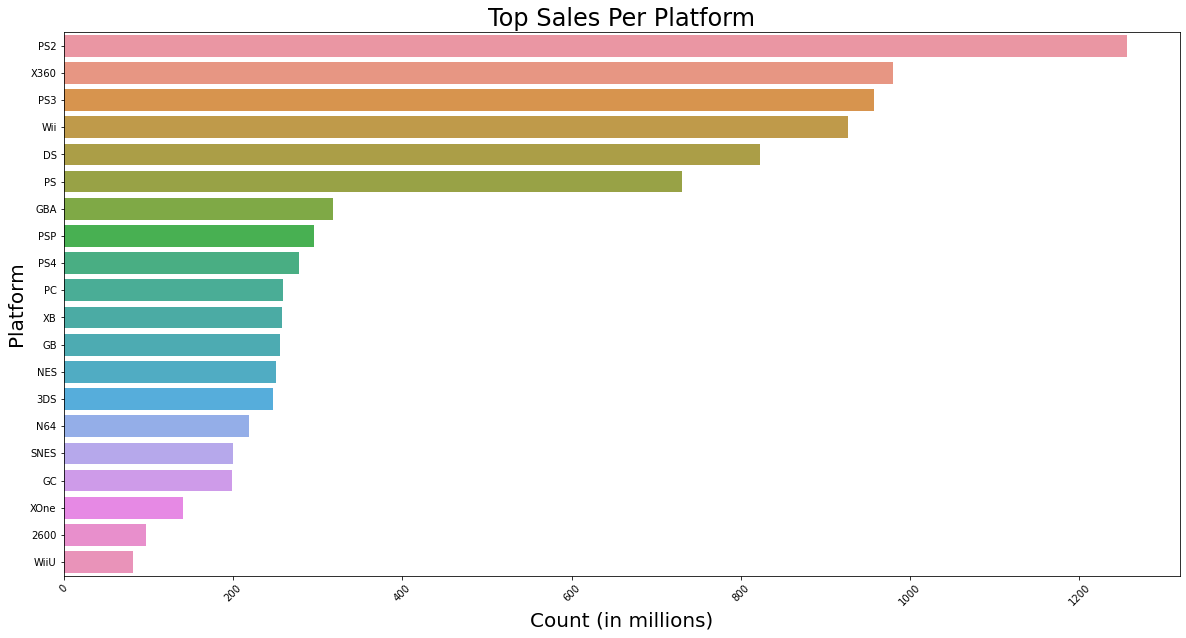

In [5]:
Top_Sales_Per(df_games_sales, 'Platform')

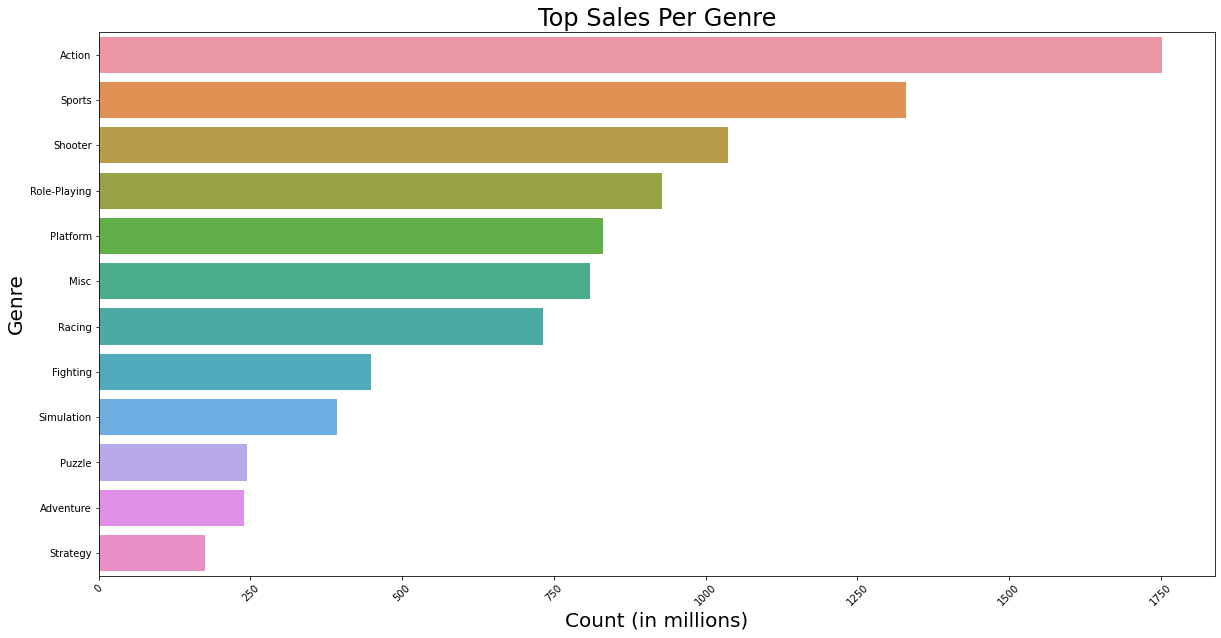

In [6]:
Top_Sales_Per(df_games_sales, 'Genre')

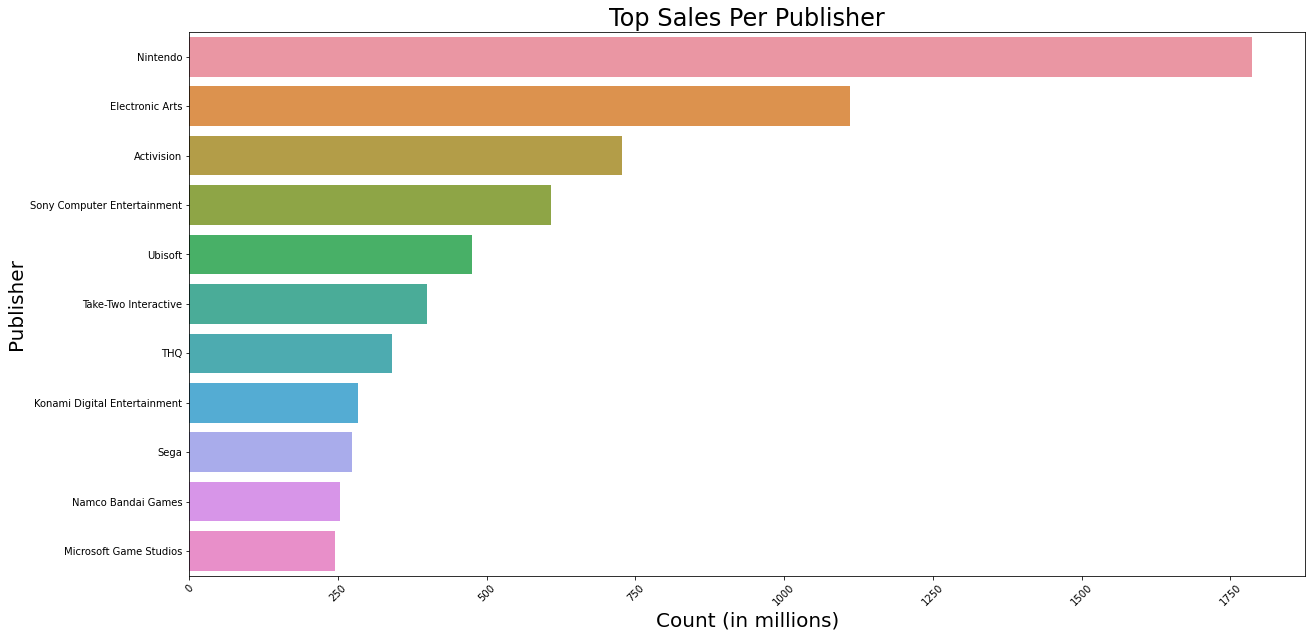

In [7]:
Top_Sales_Per(df_games_sales, 'Publisher', head = 11)

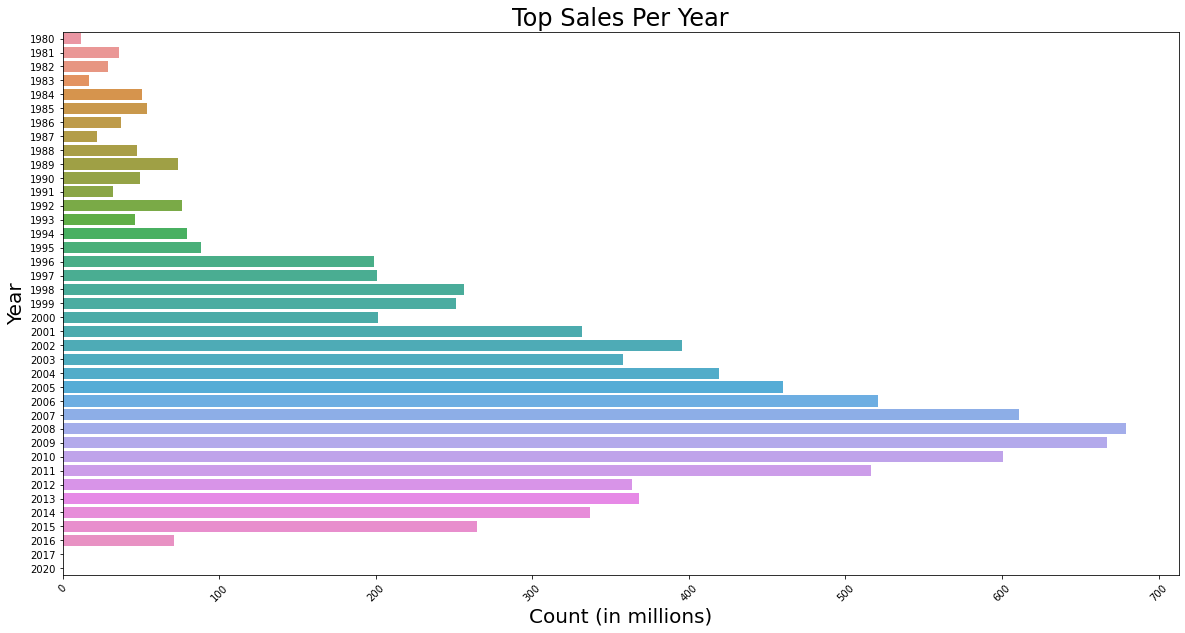

In [8]:
Top_Sales_Per(df_games_sales, 'Year')

# Votes